# Capstone 2: NBA Player Stats - Data Wrangling

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#importing data
nba_data = pd.read_csv('data/NBAStats.csv', sep=';', encoding = "ISO-8859-1")

In [3]:
#Explore Data
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [4]:
nba_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [5]:
nba_data.shape

(812, 30)

In [6]:
nba_data.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [7]:
#Check for Missing Values
nba_data.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [8]:
#Check for Duplicate Players
duplicates = nba_data.duplicated(subset = 'Player')
duplicated_players = nba_data[duplicates].sort_values('Player')
print(duplicated_players[['Age', 'Player', 'Tm', 'G']].head())

     Age         Player   Tm   G
322   25  Aaron Holiday  WAS  41
323   25  Aaron Holiday  PHO  22
376   25  Alize Johnson  NOP   4
375   25  Alize Johnson  WAS   3
374   25  Alize Johnson  CHI  16


In [10]:
nba_data.loc[nba_data['Player'] == 'Aaron Holiday']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
321,244,Aaron Holiday,PG,25,TOT,63,15,16.2,2.4,5.4,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
322,244,Aaron Holiday,PG,25,WAS,41,14,16.2,2.4,5.2,...,0.800,0.2,1.4,1.6,1.9,0.6,0.2,1.0,1.5,6.1
323,244,Aaron Holiday,PG,25,PHO,22,1,16.3,2.3,5.6,...,0.939,0.7,1.8,2.5,3.4,0.8,0.0,1.3,1.5,6.8


In [11]:
nba_data[duplicates]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
12,10,Justin Anderson,SF,28,CLE,3,0,15.7,1.3,2.7,...,0.750,0.0,2.0,2.0,2.0,0.3,0.0,0.7,1.3,4.3
13,10,Justin Anderson,SF,28,IND,13,6,20.7,2.5,6.7,...,0.800,0.3,2.8,3.1,2.1,0.5,0.5,0.5,1.4,6.8
23,19,D.J. Augustin,PG,34,HOU,34,2,15.0,1.6,4.0,...,0.868,0.2,1.0,1.2,2.2,0.3,0.0,1.3,0.5,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,593,Justise Winslow,SF,25,POR,11,10,26.8,4.3,10.5,...,0.560,1.8,4.5,6.3,2.9,1.3,0.6,1.1,1.9,10.7
802,599,Moses Wright,PF,23,LAC,1,0,1.0,0.0,0.0,...,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
803,599,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,...,1.000,0.3,0.7,1.0,0.3,0.0,0.3,0.0,0.0,1.7
806,601,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,...,0.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1


In [12]:
#Drop Duplicated Players from nba data
nba_data_unique = nba_data.drop_duplicates(subset='Player')

In [13]:
#Check for duplicates again and assert to verify de-duplication.
duplicates = nba_data_unique.duplicated(subset = 'Player', keep = False)
nba_data_dups = nba_data_unique[duplicates == True]
assert nba_data_dups.shape[0] == 0

In [14]:
nba_data_unique.shape

(605, 30)

In [17]:
#Dropping Columns unrelated to player individual game statistics 
nba_player_stats = nba_data_unique.drop(columns=['Rk', 'Age', 'Tm', 'GS'])

In [18]:
nba_player_stats.head()

,Player,Pos,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,73,23.6,3.6,8.3,0.439,0.8,2.1,0.359,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,76,26.3,2.8,5.1,0.547,0.0,0.0,0.000,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,32,11.3,1.7,4.1,0.402,0.2,1.5,0.125,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,47,22.3,5.4,9.7,0.550,0.3,1.0,0.304,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [19]:
nba_player_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 811
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  605 non-null    object 
 1   Pos     605 non-null    object 
 2   G       605 non-null    int64  
 3   MP      605 non-null    float64
 4   FG      605 non-null    float64
 5   FGA     605 non-null    float64
 6   FG%     605 non-null    float64
 7   3P      605 non-null    float64
 8   3PA     605 non-null    float64
 9   3P%     605 non-null    float64
 10  2P      605 non-null    float64
 11  2PA     605 non-null    float64
 12  2P%     605 non-null    float64
 13  eFG%    605 non-null    float64
 14  FT      605 non-null    float64
 15  FTA     605 non-null    float64
 16  FT%     605 non-null    float64
 17  ORB     605 non-null    float64
 18  DRB     605 non-null    float64
 19  TRB     605 non-null    float64
 20  AST     605 non-null    float64
 21  STL     605 non-null    float64
 22  BL

In [24]:
nba_player_stats.shape

(605, 26)

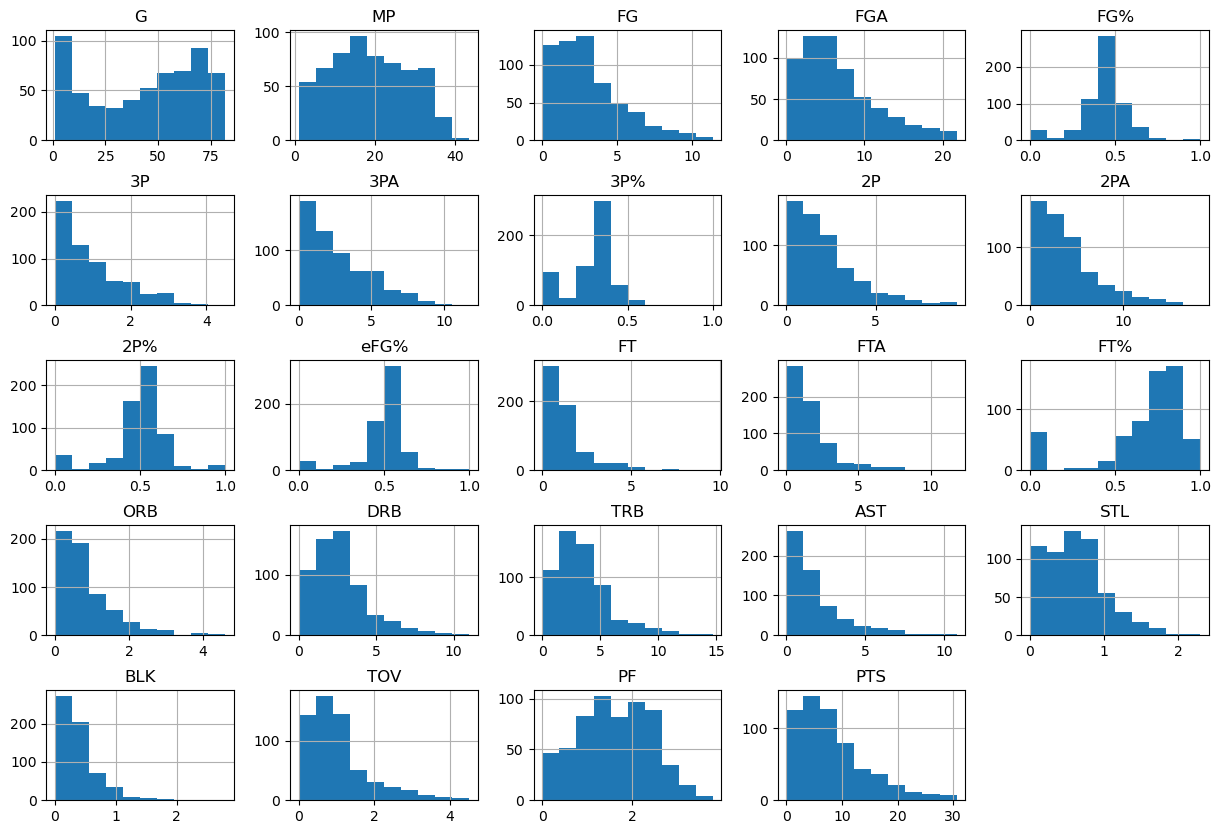

In [20]:
#Check Distribution of Feature Values for Outliers
nba_player_stats.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [21]:
nba_player_stats.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,...,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,43.038017,18.915372,3.037025,6.722479,0.431927,0.915537,2.685785,0.282545,2.122975,4.037686,...,0.674717,0.825289,2.622149,3.447107,1.868264,0.606777,0.369587,1.016198,1.601488,8.240331
std,25.818269,9.747549,2.293466,4.822415,0.142360,0.862322,2.268689,0.142984,1.823572,3.330672,...,0.263188,0.746585,1.834720,2.405068,1.833794,0.414757,0.375315,0.825626,0.797688,6.332871
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,11.100000,1.300000,3.200000,0.393000,0.200000,0.900000,0.237000,0.800000,1.500000,...,0.625000,0.300000,1.300000,1.800000,0.600000,0.300000,0.100000,0.500000,1.000000,3.500000
50%,48.000000,18.100000,2.600000,5.500000,0.441000,0.700000,2.100000,0.327000,1.700000,3.200000,...,0.753000,0.600000,2.400000,3.000000,1.200000,0.500000,0.300000,0.800000,1.600000,6.900000
75%,66.000000,27.300000,4.100000,9.100000,0.496000,1.400000,4.100000,0.369000,2.900000,5.400000,...,0.836000,1.100000,3.500000,4.500000,2.500000,0.900000,0.500000,1.300000,2.200000,11.100000
max,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,1.000000,9.500000,18.300000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.300000,2.800000,4.500000,3.800000,30.600000


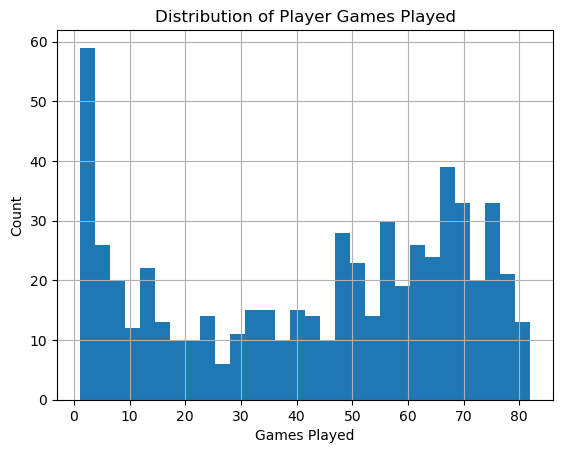

In [22]:
#Check for outliers in games played that may skew player stats
nba_player_stats.G.hist(bins=30)
plt.xlabel('Games Played')
plt.ylabel('Count')
plt.title('Distribution of Player Games Played');

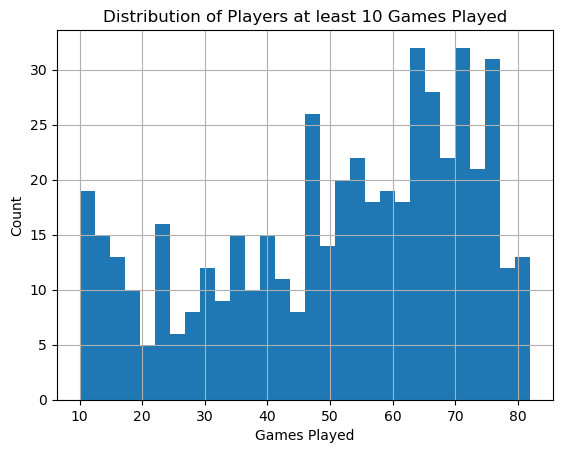

In [23]:
#Distribution for Players Playing at least 10 games
nba_player_stats.G[nba_player_stats.G >= 10].hist(bins=30)
plt.xlabel('Games Played')
plt.ylabel('Count')
plt.title('Distribution of Players at least 10 Games Played');

In [25]:
nba_player_stats.G[nba_player_stats.G >= 10].describe()

count    500.000000
mean      51.266000
std       20.364298
min       10.000000
25%       36.000000
50%       55.000000
75%       68.000000
max       82.000000
Name: G, dtype: float64

In [26]:
#Filter NBA Stats for Players with at least 10 G played
nba_stats = nba_player_stats[nba_player_stats.G >= 10]

In [27]:
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 811
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  500 non-null    object 
 1   Pos     500 non-null    object 
 2   G       500 non-null    int64  
 3   MP      500 non-null    float64
 4   FG      500 non-null    float64
 5   FGA     500 non-null    float64
 6   FG%     500 non-null    float64
 7   3P      500 non-null    float64
 8   3PA     500 non-null    float64
 9   3P%     500 non-null    float64
 10  2P      500 non-null    float64
 11  2PA     500 non-null    float64
 12  2P%     500 non-null    float64
 13  eFG%    500 non-null    float64
 14  FT      500 non-null    float64
 15  FTA     500 non-null    float64
 16  FT%     500 non-null    float64
 17  ORB     500 non-null    float64
 18  DRB     500 non-null    float64
 19  TRB     500 non-null    float64
 20  AST     500 non-null    float64
 21  STL     500 non-null    float64
 22  BL

In [28]:
nba_stats.shape

(500, 26)

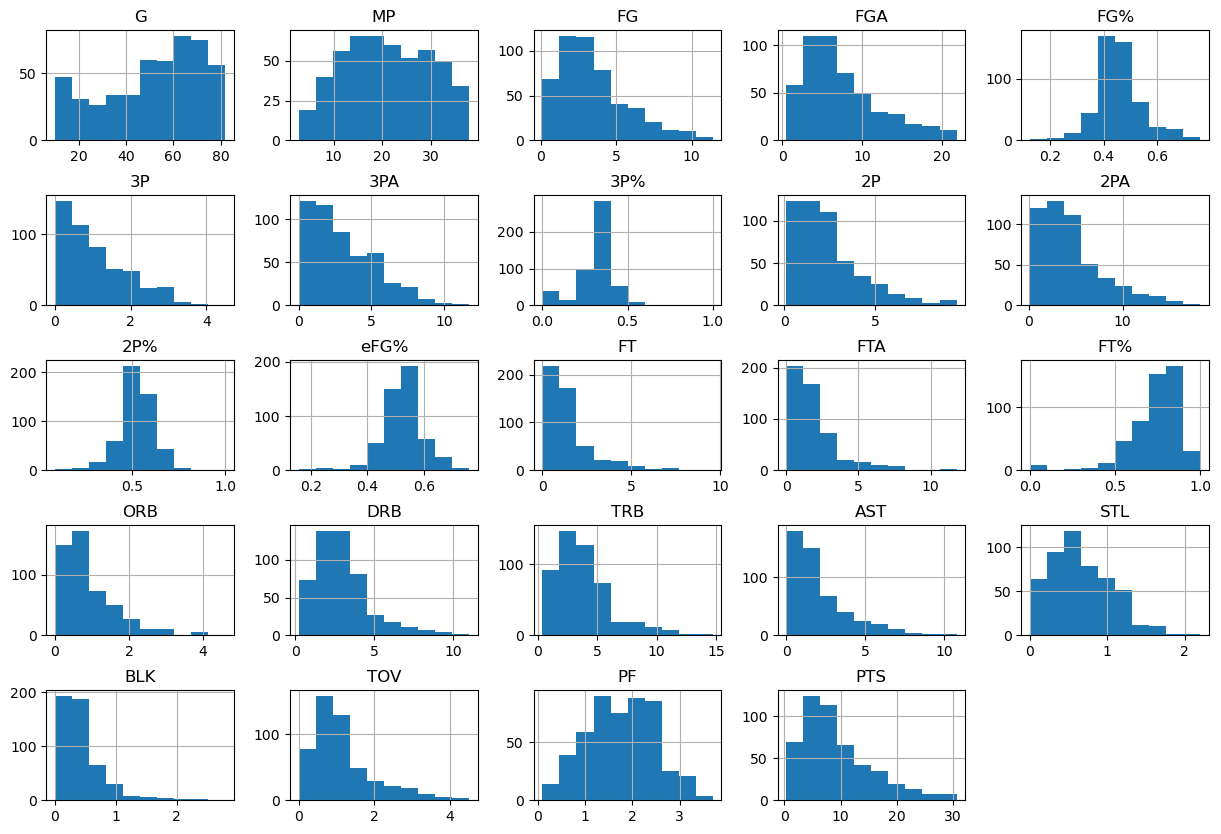

In [29]:
#Review Distributions
nba_stats.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [24]:
#save data
nba_stats.to_csv('data/nba_stats_cleaned.csv')

## Summary

The raw NBA Player Game Statistic dataset contained 812 rows with 30 columns. The first problem encountered when exploring the raw dataset was that it contained duplicate player names. This was because the dataset accounted for players who played on multiple teams during the NBA season by having an entry with a player’s total statistics as well as separate entries with statistics based on each team a player was on. Since we are only focusing on a player’s comprehensive season statistics, the additional 207 rows containing multiple team player’s statistics spit into different teams were dropped. 

The rank (RK), age (Age), team (Tm), and games started (GS) columns were dropped because they were not relevant to our analysis of a player’s individual game statistics

A baseline check of the distribution of feature values was done to spot any potential outliers that may skew player statistics. Since we want to analyze NBA players who have realistically opportunities to play and impact the game, we filtered the dataset to only contain players who played at least 10 games. This filtered out 105 players from the dataset. 

The final shape of dataset was 500 rows with 26 columns. 